## Question

Q3) Design RNN or its variant including LSTM or GRU a) Select a suitable time series
dataset. Example – predict sentiments based on product reviews b) Apply for prediction

In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset with only the top 10,000 most common words
vocab_size = 10000
max_len = 200  # pad or truncate reviews to this length

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    LSTM(128),
    Dense(1, activation='sigmoid')  # Binary classification (positive/negative)
])

C:\Users\niraj_1kwckht\anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 263ms/step - accuracy: 0.6659 - loss: 0.5799 - val_accuracy: 0.8652 - val_loss: 0.3279
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 258ms/step - accuracy: 0.8934 - loss: 0.2670 - val_accuracy: 0.8692 - val_loss: 0.3084
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 258ms/step - accuracy: 0.9323 - loss: 0.1919 - val_accuracy: 0.8480 - val_loss: 0.3543
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 259ms/step - accuracy: 0.9377 - loss: 0.1707 - val_accuracy: 0.8540 - val_loss: 0.3499
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 259ms/step - accuracy: 0.9551 - loss: 0.1269 - val_accuracy: 0.8730 - val_loss: 0.3692


In [6]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predict
y_pred = (model.predict(X_test) > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.8594 - loss: 0.4153
Test Accuracy: 86.09%
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step


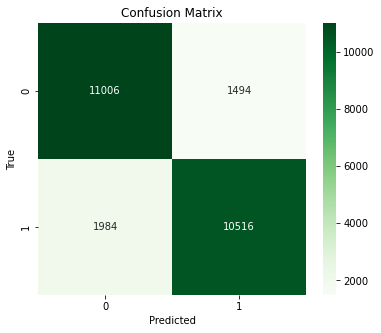

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [9]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

              precision    recall  f1-score   support

    Negative       0.85      0.88      0.86     12500
    Positive       0.88      0.84      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



## Question

Q16) A property review site wants to predict user sentiment (positive or negative) based on
their written reviews. Build a sentiment classification model using an RNN on simulated
review text data

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [27]:
# Load data with the top 10,000 most frequent words
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [28]:
# Pad sequences to the same length
max_length = 200
x_train_padded = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test_padded = pad_sequences(x_test, maxlen=max_length, padding='post')

In [29]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.fit(x_train_padded, y_train, epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 155ms/step - accuracy: 0.5424 - loss: 0.6859 - val_accuracy: 0.6724 - val_loss: 0.5281
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 154ms/step - accuracy: 0.6936 - loss: 0.6302 - val_accuracy: 0.6878 - val_loss: 0.6142
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - accuracy: 0.7124 - loss: 0.5823 - val_accuracy: 0.5660 - val_loss: 0.6639


In [32]:
# Get the word index mapping
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def encode_review(text):
    tokens = text.lower().split()
    encoded = []
    for word in tokens:
        if word in word_index and word_index[word] < vocab_size:
            encoded.append(word_index[word])
        else:
            encoded.append(2)  # 2 is reserved for unknown token
    return encoded

In [33]:
# User input
user_review = input("Enter your property review: ")

# Encode and pad
encoded_review = encode_review(user_review)
padded_review = pad_sequences([encoded_review], maxlen=max_length, padding='post')

Enter your property review: good product


In [34]:
# Predict
prediction = model.predict(padded_review)[0][0]
if prediction >= 0.5:
    print(f"\n🟢 Sentiment: Positive (Confidence: {prediction:.2f})")
else:
    print(f"\n🔴 Sentiment: Negative (Confidence: {1 - prediction:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step

🟢 Sentiment: Positive (Confidence: 0.85)
